<a href="https://colab.research.google.com/github/pragatii-sharmaa/AI-ML-codes/blob/main/Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('fair_airline.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv('fair_airline.csv')
df=df.drop('Unnamed: 0',axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
df.shape

(300153, 11)

**Indigo becaming as a most popular Airline**

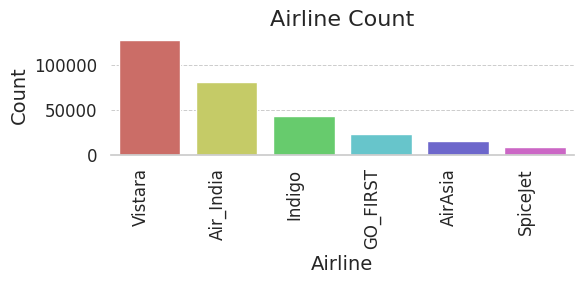

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))  # Set the figure size
sns.set(style="whitegrid")  # Apply a white grid background style
sns.countplot(x='airline', data=df, palette='hls', order=df['airline'].value_counts().index) # Changed df1 to df
# The variable 'df' was used for loading and preprocessing the data.
# This change assumes that 'df1' was intended to refer to the same data.

plt.title('Airline Count', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
sns.despine(left=True)  # Removes the left spine for a cleaner look
plt.tight_layout()
plt.show()

**Most of the Airlines has Economic Class as common**

In [8]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

,count
class,
Economy,1560
Business,295


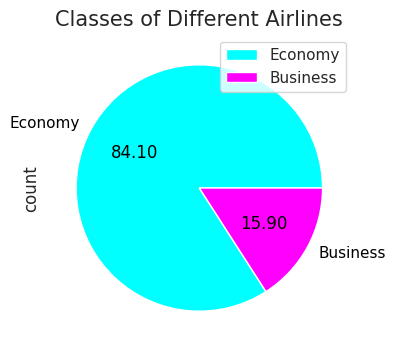

In [9]:
plt.figure(figsize=(6,4))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

**Does price vary with Airlines?**
As we can see Vistara has Maximum Price range Vistara and Air_India Airlines Have Maximum Price when compared to Others SpiceJet , AirAsia , GO_First and Indigo has some what equal prices

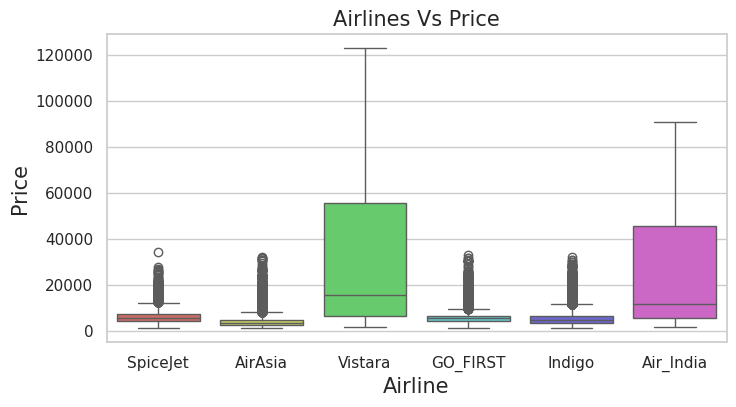

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**How Does the Ticket Price vary between Economy and Business Class?**
Ticket Price is Maximum for Bussiness Class When compared to Economy Class

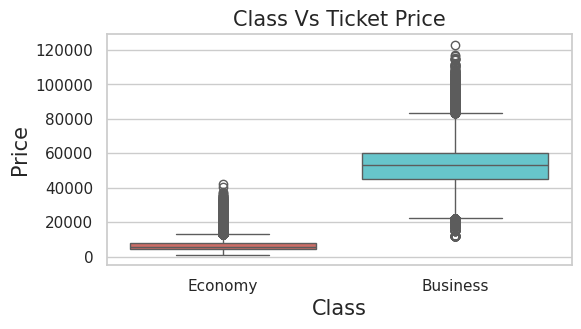

In [11]:
plt.figure(figsize=(6,3))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**How Does the Ticket Price vary with the number of stops of a Flight?**

Flights having one stop has maximum ticket price

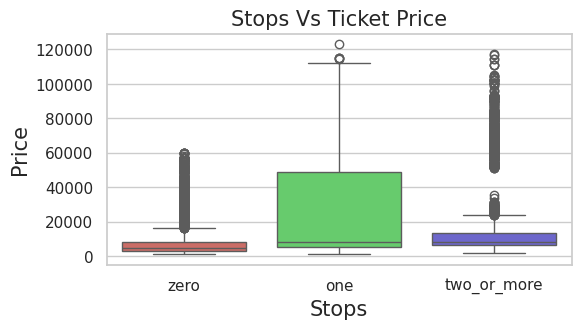

In [12]:
plt.figure(figsize=(6,3))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**How the Ticket Price change based on the Departure Time and Arrival Time?**

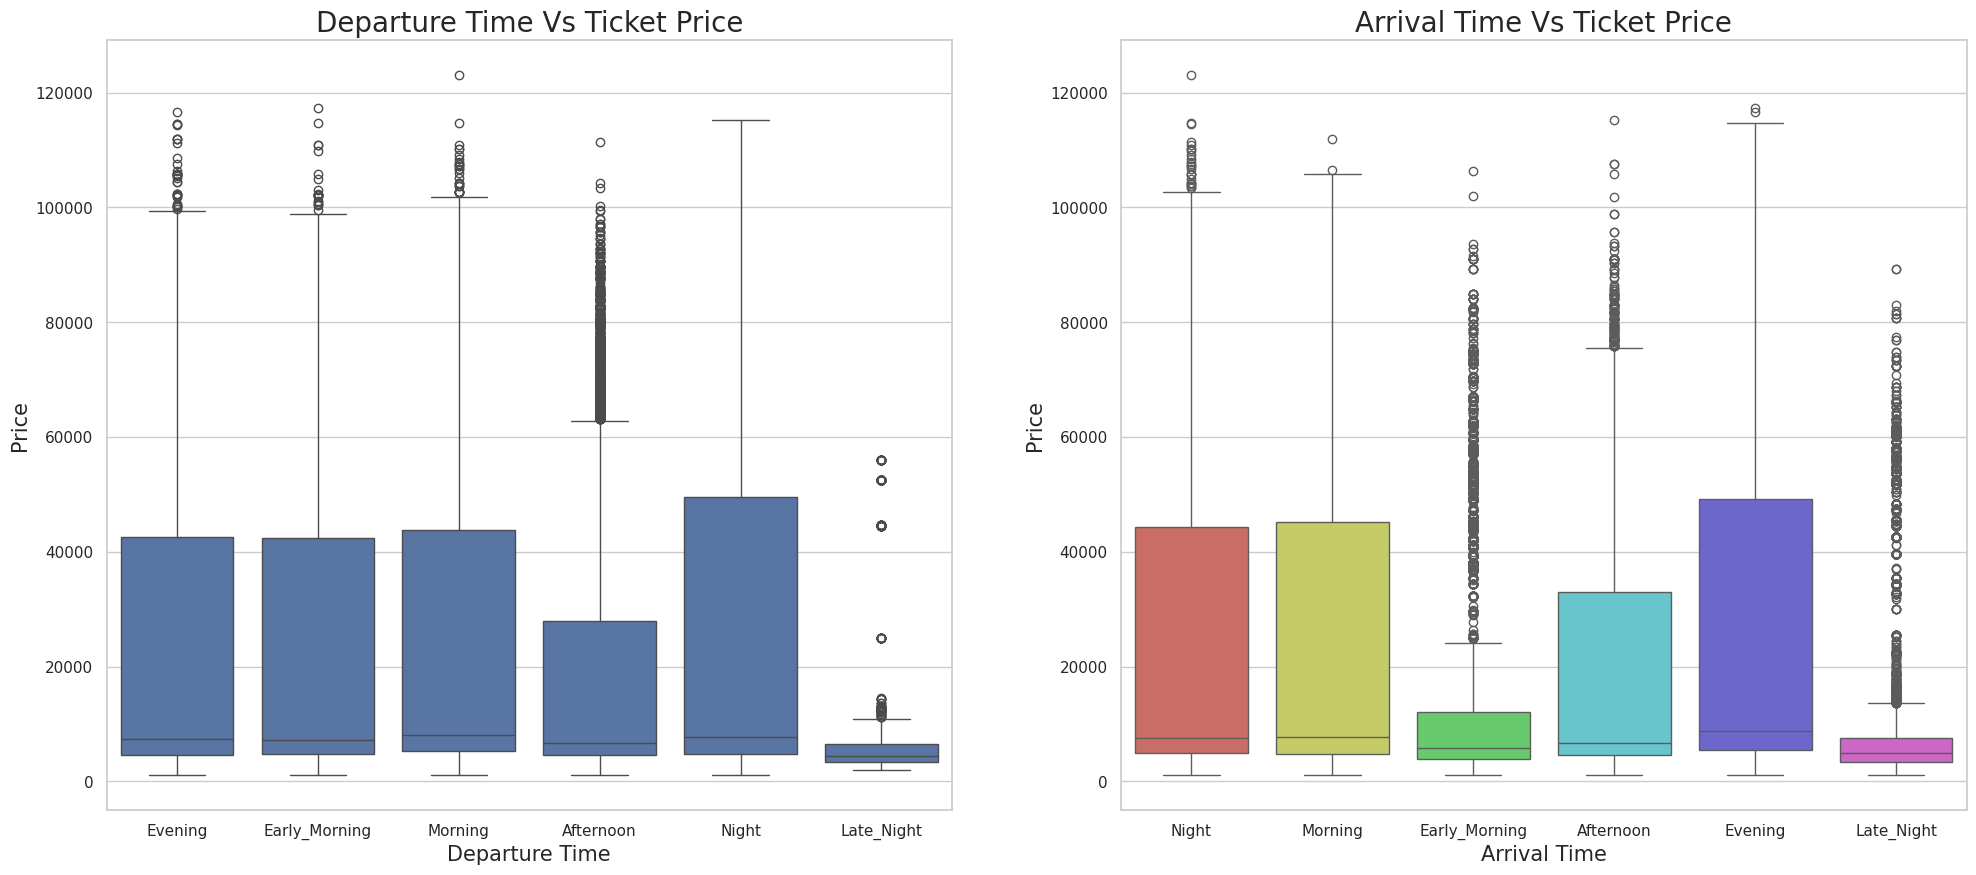

In [13]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**How the price changes with change in Source city and Destination city?**

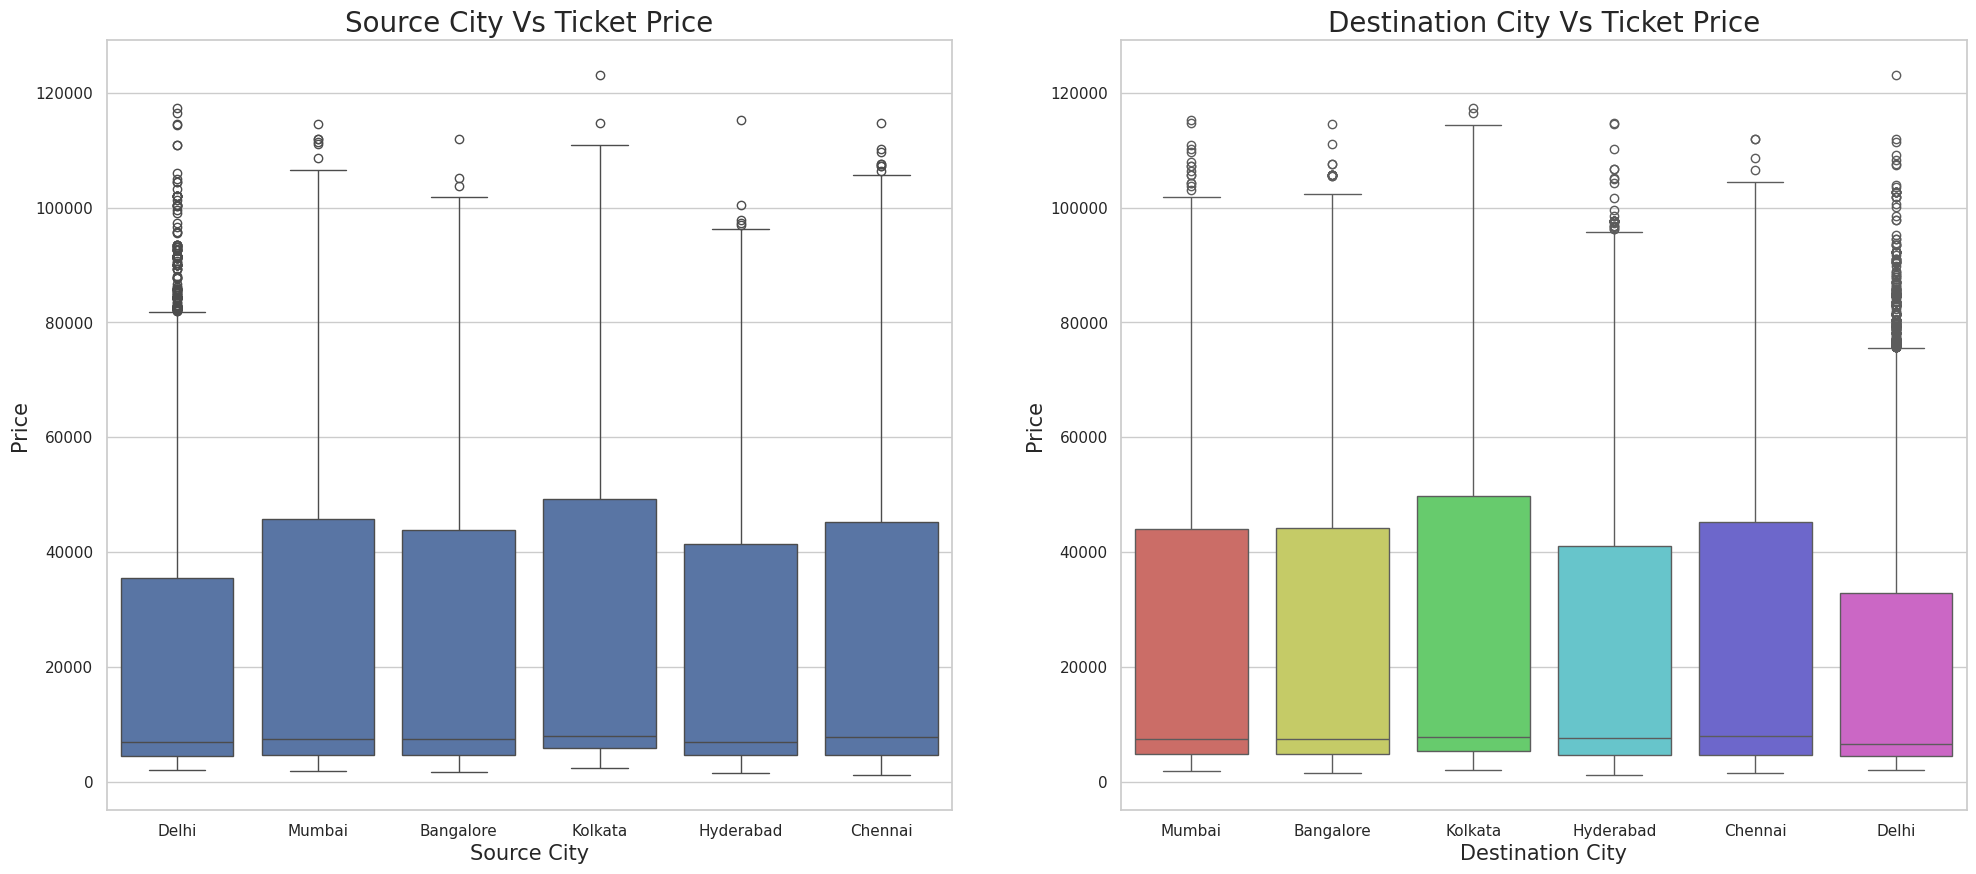

In [14]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


**How Price Varies with the Flight Duration Based on Class?**

With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes

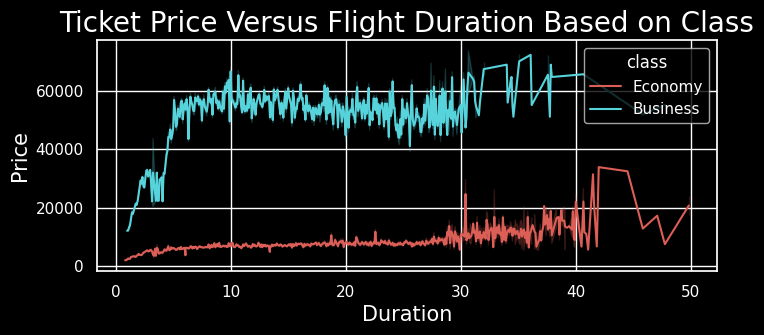

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(8,3))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**How does the price affected on the days left for Departure?**

As we can see when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines

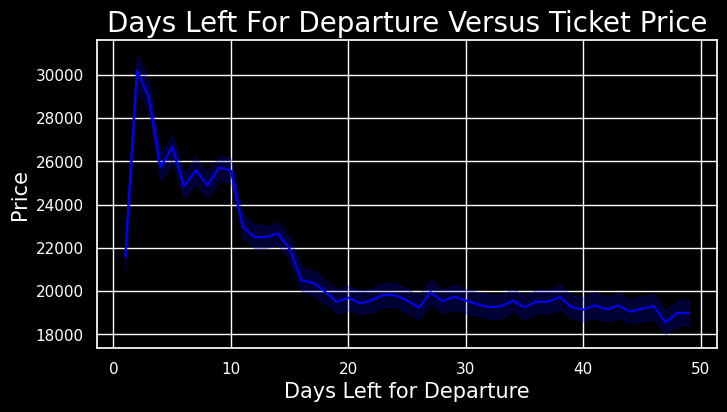

In [16]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

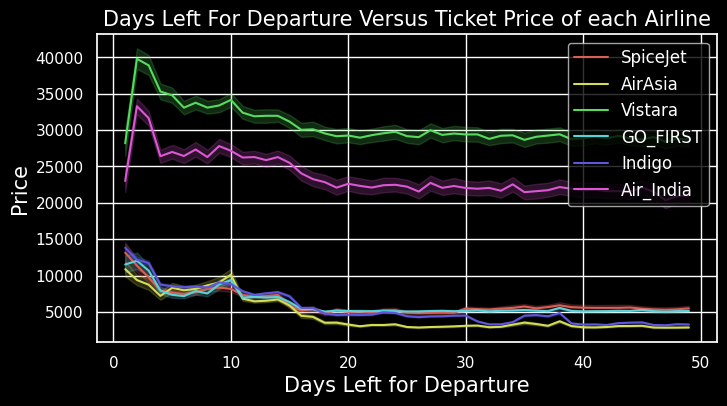

In [17]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df,x='days_left',y='price',color='violet',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Total flights from one city to another**

In [18]:
df.groupby(['flight','source_city','destination_city','airline',
            'class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


**Average Price of different Airlnes from Source city to Destination city**

In [19]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [20]:
df_bk=df.copy()

In [21]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [22]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['price'],axis=1)
y=df['price']

In [23]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [24]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [25]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [26]:
!pip install xgboost

In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# Initialize the Results DataFrame
Results = pd.DataFrame()

# List of models
MM = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(n_neighbors=5),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor(),
    BaggingRegressor(),
    Ridge(),
    Lasso(alpha=0.1)
]

# Loop over the models
for models in MM:
    models.fit(x_train, y_train)  # Fit the model
    y_pred = models.predict(x_test)  # Predict the test set

    print('Model Name: ', type(models).__name__)
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred), 3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred), 3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred), 6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 3))

    # Define the function to calculate the MAPE
    def MAPE(y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values
    r_squared = metrics.r2_score(y_test, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
    print('Adj R Square: ', round(adjusted_r_squared, 6))
    print('------------------------------------------------------------------------------------------------------------')

    # Create a DataFrame for the new row and concatenate it to Results
    new_row = pd.DataFrame({
        'Model Name': [type(models).__name__],
        'Mean_Absolute_Error_MAE': [metrics.mean_absolute_error(y_test, y_pred)],
        'Adj_R_Square': [adjusted_r_squared],
        'Root_Mean_Squared_Error_RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_pred))],
        'Mean_Absolute_Percentage_Error_MAPE': [result],
        'Mean_Squared_Error_MSE': [metrics.mean_squared_error(y_test, y_pred)],
        'Root_Mean_Squared_Log_Error_RMSLE': [np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))],
        'R2_score': [metrics.r2_score(y_test, y_pred)]
    })

    Results = pd.concat([Results, new_row], ignore_index=True)

Model Name:  LinearRegression
Mean Absolute Error (MAE): 4630.242
Mean Squared Error (MSE): 49069997.494
Root Mean Squared Error (RMSE): 7004.998
R2_score: 0.904657
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904654
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor
Mean Absolute Error (MAE): 1256.112
Mean Squared Error (MSE): 13608836.688
Root Mean Squared Error (RMSE): 3689.016
R2_score: 0.973558
Root Mean Squared Log Error (RMSLE): 8.213
Mean Absolute Percentage Error (MAPE): 8.66 %
Adj R Square:  0.973557
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor
Mean Absolute Error (MAE): 1169.604
Mean Squared Error (MSE): 8213759.768
Root Mean Squared Error (RMSE): 2865.966
R2_score: 0.984041
Root Mean Squared Log Error (RMSLE): 7.961
Mean Abs

In [28]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression,4630.242106,0.904654,7004.998037,43.887045,4.907000e+07,8.854379,0.904657
1,DecisionTreeRegressor,1256.112130,0.973557,3689.015680,8.655566,1.360884e+07,8.213115,0.973558
2,RandomForestRegressor,1169.604137,0.984040,2865.965765,7.910898,8.213760e+06,7.960661,0.984041
3,KNeighborsRegressor,1853.662466,0.971654,3819.431258,11.105701,1.458806e+07,8.247857,0.971655
4,ExtraTreesRegressor,1145.880265,0.984697,2806.344960,7.650019,7.875572e+06,7.939638,0.984698
5,GradientBoostingRegressor,2808.076647,0.956823,4713.931544,20.673154,2.222115e+07,8.458278,0.956824
6,XGBRegressor,1845.132690,0.977616,3394.133026,14.097315,1.152014e+07,8.129804,0.977616
7,BaggingRegressor,1208.456994,0.982929,2964.077111,8.293493,8.785753e+06,7.994321,0.982929
8,Ridge,4630.259805,0.904654,7004.994188,43.887232,4.906994e+07,8.854379,0.904657
9,Lasso,4630.125653,0.904654,7004.988785,43.883936,4.906987e+07,8.854378,0.904657


In [30]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.984697,1145.880265,2806.344960,7.650019,7.875572e+06,7.939638,0.984698
1,RandomForestRegressor,0.984040,1169.604137,2865.965765,7.910898,8.213760e+06,7.960661,0.984041
2,BaggingRegressor,0.982929,1208.456994,2964.077111,8.293493,8.785753e+06,7.994321,0.982929
3,XGBRegressor,0.977616,1845.132690,3394.133026,14.097315,1.152014e+07,8.129804,0.977616
4,DecisionTreeRegressor,0.973557,1256.112130,3689.015680,8.655566,1.360884e+07,8.213115,0.973558
5,KNeighborsRegressor,0.971654,1853.662466,3819.431258,11.105701,1.458806e+07,8.247857,0.971655
6,GradientBoostingRegressor,0.956823,2808.076647,4713.931544,20.673154,2.222115e+07,8.458278,0.956824
7,Lasso Regression,0.904654,4630.125653,7004.988785,43.883936,4.906987e+07,8.854378,0.904657
8,Ridge Regression,0.904654,4630.259805,7004.994188,43.887232,4.906994e+07,8.854379,0.904657
9,LinearRegression,0.904654,4630.242106,7004.998037,43.887045,4.907000e+07,8.854379,0.904657


In [31]:
#Trainig the model with
from sklearn.ensemble import ExtraTreesRegressor # Importing the ExtraTreesRegressor
modelETR = ExtraTreesRegressor() # Creating an instance of the ExtraTreesRegressor and assigning it to modelETR
modelETR.fit(x_train, y_train)

# Predict the model with test data

y_pred = modelETR.predict(x_test)


In [32]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [33]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
241115,Vistara,UK-950,Mumbai,Night,one,Morning,Hyderabad,Business,11.50,44,58125,58125,58780.20
272353,Vistara,UK-772,Kolkata,Morning,one,Night,Hyderabad,Business,10.50,45,49207,49207,63988.25
61066,Air_India,AI-615,Mumbai,Early_Morning,one,Night,Bangalore,Economy,16.50,47,3948,3948,4201.52
96989,Vistara,UK-657,Bangalore,Morning,one,Night,Mumbai,Economy,10.08,18,16309,16309,12472.38
76381,Vistara,UK-994,Mumbai,Morning,one,Evening,Hyderabad,Economy,6.58,43,4099,4099,4099.00
285357,Vistara,UK-870,Hyderabad,Night,one,Night,Kolkata,Business,26.33,49,51819,51819,51970.84
12007,Vistara,UK-943,Delhi,Early_Morning,one,Evening,Bangalore,Economy,10.25,12,10680,10680,10688.22
214681,Vistara,UK-815,Delhi,Morning,zero,Morning,Bangalore,Business,2.75,35,32859,32859,32860.92
265940,Vistara,UK-738,Kolkata,Evening,two_or_more,Night,Mumbai,Business,26.83,29,74273,74273,59641.80
163183,AirAsia,I5-972,Hyderabad,Evening,one,Late_Night,Mumbai,Economy,8.17,34,2250,2250,2492.31


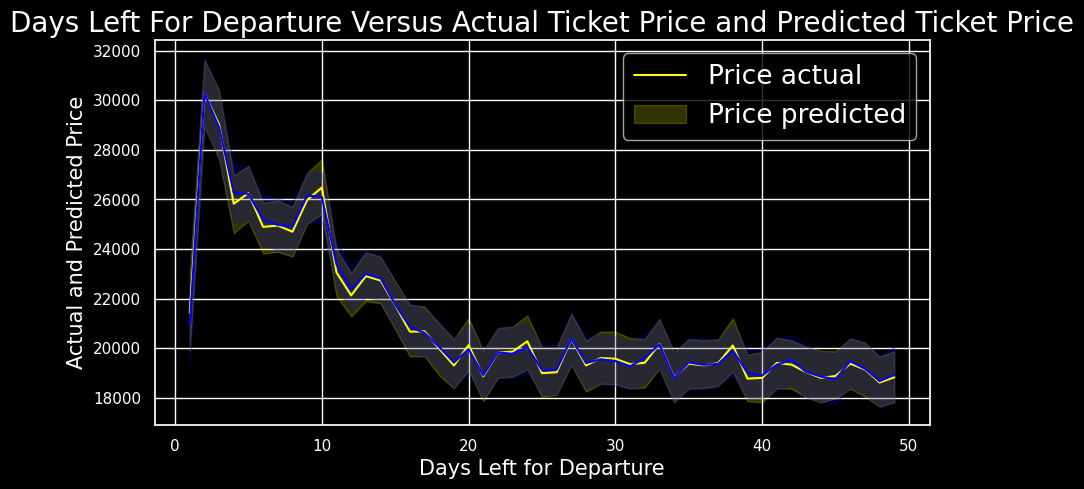

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='yellow')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

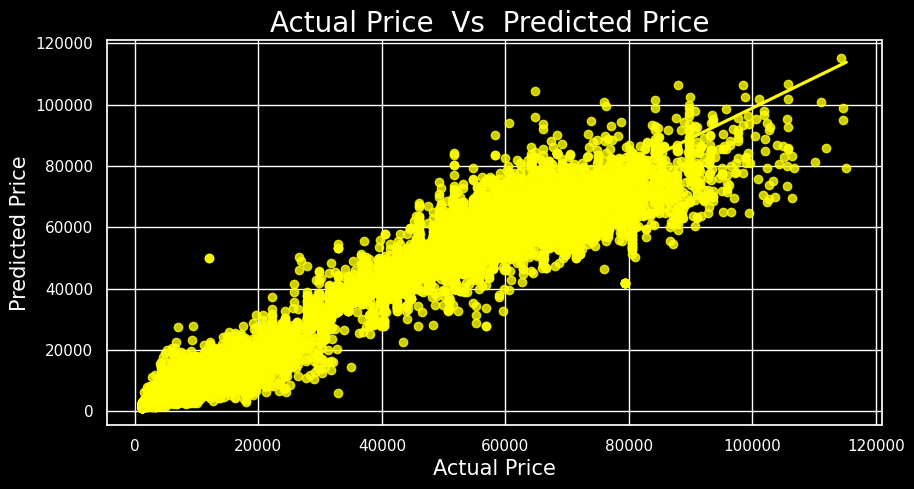

In [36]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='yellow')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()